In [204]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import davies_bouldin_score
from sklearn.preprocessing import normalize, MinMaxScaler
from sklearn.neighbors import NearestNeighbors, LocalOutlierFactor
from collections import Counter
from scipy import stats
import numpy as np

## TASK 0:
data = pd.read_csv('iris_clusters.csv', delimiter=";")

In [205]:
## TASK 2:
# 1. A min-max rescaling
#data2 = data;
data[['pl','pw','sl','sw']] = MinMaxScaler((0, 1)).fit_transform(data[['pl','pw','sl','sw']])
# data[['pl','pw','sl','sw']] = normalize(data[['pl','pw','sl','sw']])


# 2. Detect Outliers
#sl_z = stats.zscore(data['sl'])
#print(np.sort(stats.zscore(data['sl'])))

# 3. Filter out the identified outliers
#data = data[np.abs(sl_z) < 2]


lof = LocalOutlierFactor(n_neighbors=5)

labels = lof.fit_predict(data[['pl','pw','sl','sw']])
scores = lof.negative_outlier_factor_
data = data[labels == 1]


scores:  [ -0.96642742  -1.13054     -0.98962413  -1.17134385  -1.05575193
  -0.99367558  -1.08362446  -1.0236962   -1.04690051  -1.00288175
  -1.00867505  -1.00259204  -0.95004167  -1.02232935  -1.00151823
  -1.00262849  -0.99524798  -1.15389206  -1.46689631  -1.02760049
  -1.23747558  -1.10525825  -1.08812303  -1.06432029  -1.06451707
  -1.03838667  -0.9734141   -1.03218892  -1.05503376  -0.9938966
  -1.05282659  -1.11576412  -1.03302348  -1.00258961  -1.03924557
  -1.08615711  -1.21769288  -1.13539714  -1.00696262  -1.07834822
  -0.9817631   -1.05484345  -3.08989829  -7.90520732  -1.16815108
  -1.03457525  -1.35929715  -0.99388648  -0.97151269  -1.05067079
  -1.28826601  -1.24127622  -1.29414215  -1.10103819  -1.66791465
  -1.18426017  -1.02239341  -0.96154682  -1.12372142  -0.97813484
  -1.09735105  -0.99174435  -0.99470421  -1.01343905  -0.9648629
  -1.08280371  -1.01399628  -0.9919643   -0.96087701  -1.09285059
  -0.9741095   -1.09404247  -0.98651123  -1.15568332  -1.07326682
  -

dict_keys([0, 1, 2])
dict_values([93, 95, 94])
[[0.04031672 0.29776675 0.22015082 0.50193548]
 [0.01873638 0.58137652 0.03547505 0.07873684]
 [0.04999305 0.39811784 0.2890992  0.78893617]]


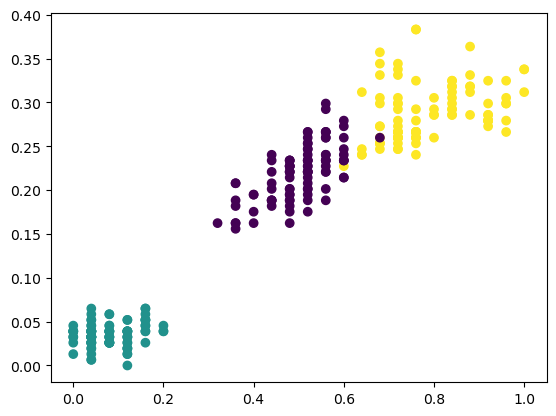

In [206]:
## TASK 1:
kmeans = KMeans(n_clusters=3)
kmeans = kmeans.fit(data[['pl','pw','sl','sw']])

print(Counter(kmeans.labels_).keys())
print(Counter(kmeans.labels_).values())
print(kmeans.cluster_centers_)

plt.scatter(data["sw"], data["sl"], c=kmeans.labels_, cmap='viridis')
plt.show()


In [207]:
## TASK 3:
best_k = -1
best_davies_bouldin_score = 9999999
for k in range(2,11):
    kmeans = KMeans(n_clusters=k)
    kmeans = kmeans.fit(data[['pl','pw','sl','sw']])
    score = davies_bouldin_score(data[['pl','pw','sl','sw']], kmeans.labels_)
    if score < best_davies_bouldin_score:
        best_davies_bouldin_score = score
        best_k = k
print(f"KMeans: best david bowie score: {best_davies_bouldin_score}, k: {best_k}")

KMeans: best david bowie score: 0.4872030877763361, k: 2


Agglomaerative: best david bowie score: 0.4872030877763361, k: 2
Agglomaerative: Records, dict_values([187, 95])


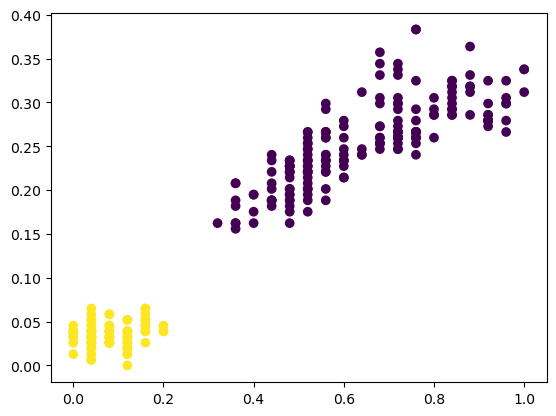

In [208]:
## TASK 4:
best_k = -1
best_davies_bouldin_score = 9999999
best_labels = []
for k in range(2,11):
    clustering = AgglomerativeClustering(n_clusters=k, linkage='complete')
    clustering = clustering.fit(data[['pl','pw','sl','sw']])
    score = davies_bouldin_score(data[['pl','pw','sl','sw']], clustering.labels_)
    if score < best_davies_bouldin_score:
        best_davies_bouldin_score = score
        best_k = k
        best_labels = clustering.labels_

print(f"Agglomaerative: best david bowie score: {best_davies_bouldin_score}, k: {best_k}")
print(f"Agglomaerative: Records, {Counter(best_labels).values()}")

plt.scatter(data["sw"], data["sl"], c=best_labels, cmap='viridis')
plt.show()

Clusters found: 1


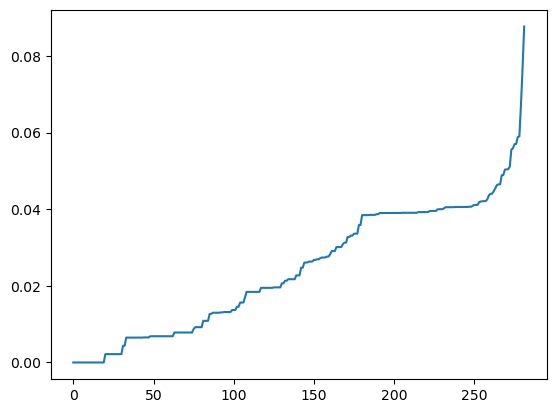

In [209]:
## TASK 5:
clustering = DBSCAN(eps=284, min_samples=5).fit(data[['pl','pw','sl','sw']])
# 1. How many clusters does DB-SCAN find using eps=1, min_samples=5?
print(f"Clusters found: {len(Counter(clustering.labels_).keys())}")
# 2. Leaving min_samples unchanged (5), can you manually find a value for epsilon
# leading to two clusters (plus noise)?
def k_distances2(X,n):
    neighbors = NearestNeighbors(n_neighbors=n)
    neighbors_fit = neighbors.fit(X)
    distances, indices = neighbors_fit.kneighbors(X)
    return distances, indices

# TODO: add your parameters here.
# data -- your normalized dataset
# k    -- k-th neighbour. By default, k=count(features)+1
distances, indices = k_distances2(data[['pl','pw','sl','sw']], 5)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.show()